### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.




In [4]:
#Place dataset in current working directory
#from IPython.external import mathjax; mathjax.install_mathjax()
import os
p = os.getcwd()
import pandas
df = pandas.read_csv(p + '/stroopdata.csv')
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [5]:
df['Subject'] = df.index+1
df

,Congruent,Incongruent,Subject
0,12.079,19.278,1
1,16.791,18.741,2
2,9.564,21.214,3
3,8.630,15.687,4
4,14.669,22.803,5
5,12.238,20.878,6
6,14.692,24.572,7
7,8.987,17.394,8
8,9.401,20.762,9
9,14.480,26.282,10



(1) What is the independent variable? What is the dependent variable?


INDEPENDENT - Word Condition (Congruent or Incongruent)

DEPENDENT - Response Time in seconds

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Ho - **Null Hypothesis**: (  μi - μc = 0 ) There is **no** significant difference in the population average response time in viewing the congruent(c) words vs viewing the incongruent(i) words.

 (𝜇𝑐𝑜𝑛𝑔𝑟𝑢𝑒𝑛𝑡 = 𝜇𝑖𝑛𝑐𝑜𝑛𝑔𝑟𝑢𝑒𝑛𝑡 or 𝜇𝑑𝑖𝑓𝑓𝑒𝑟𝑒𝑛𝑐𝑒 = 0) at alpha level of 0.5
 
Ha - **Alternative Hypothesis**: ( μi - μc ≠ 0 ) There is a significant difference, positive or negative, in the population average response times.

(𝜇𝑐𝑜𝑛𝑔𝑟𝑢𝑒𝑛𝑡 ≠ 𝜇𝑖𝑛𝑐𝑜𝑛𝑔𝑟𝑢𝑒𝑛𝑡 or 𝜇𝑑𝑖𝑓𝑓𝑒𝑟𝑒𝑛𝑐𝑒 ≠ 0) at alpha level of 0.5

Where,
𝜇𝑐𝑜𝑛𝑔𝑟𝑢𝑒𝑛𝑡 = Population Mean from which Congruent Words test sample is derived

𝜇𝑖𝑛𝑐𝑜𝑛𝑔𝑟𝑢𝑒𝑛𝑡 = Population Mean from which Incongruent Words test sample is derived

𝜇𝑑𝑖𝑓𝑓𝑒𝑟𝑒𝑛𝑐𝑒 = Difference in the population Mean of the two samples


The selection of T-test is due to the fact that, we are comparing reaction time of a sample from
same population in two different conditions and hence coming to a conclusion about the
population.
Also, considering the skewness of the data and presence of outliers (as shown in fig. 3 and fig. 4),
use of t-test ensures the robustness even if the data is not normally distributed. This ensures the
violation of assumptions without any significant errors being introduced

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [6]:
c = df['Congruent']; i = df['Incongruent']

In [7]:
c_mean = c.mean(); round(c_mean,2)

14.05

In [8]:
i_mean = i.mean(); round(i_mean,2)

22.02

In [9]:
c_sd = c.std(); round(c_sd,2)

3.56

In [10]:
i_sd = i.std(); round(i_sd,2)

4.8

--write answer here--

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

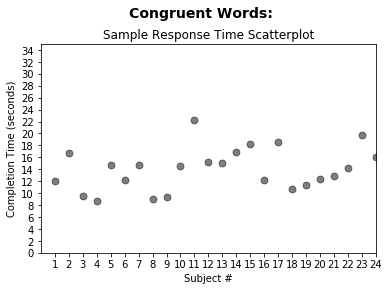

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = len(df)
x = df['Subject']
y = df['Congruent']
colors = 'black'
area = np.pi * 15 # 0 to 15 point radiuses

fig = plt.figure()
fig.suptitle('Congruent Words: ', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Sample Response Time Scatterplot')
ax.set_xlabel('Subject #')
ax.set_ylabel('Completion Time (seconds)')

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(0, 35, 2))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.ylim([0,35])
plt.xlim([0,24])
plt.show()

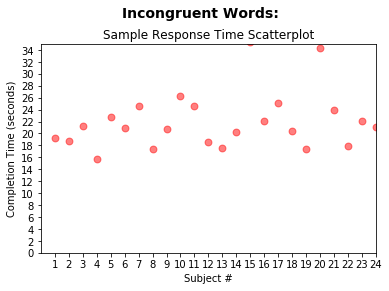

In [16]:
N = len(df)
x = df['Subject']
y = df['Incongruent']
colors = 'red'
area = np.pi * 15 # 0 to 15 point radiuses

fig = plt.figure()
fig.suptitle('Incongruent Words: ', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Sample Response Time Scatterplot')
ax.set_xlabel('Subject #')
ax.set_ylabel('Completion Time (seconds)')

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(0, 35, 2))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.ylim([0,35])
plt.xlim([0,24])
plt.show()

The congruent words sample has a distribution which is between 8 and 22 seconds and has a lower average completion time compared to the incongruent words scatterplot which shows the distibtuion is between 15 to about 26 seconds with what appears to be one outlier at 35 seconds. The average completion time is definitely higher.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

Confidence Level = 90%  
t-critical value (2-sided test) -> from [t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg)  
df = n - 1 = 24  
tcrit =  +- 1.711

In [12]:
#number of subjects in the sample
n = len(df)
n

24

In [13]:
#point estimate of μi - μc -> PE (in seconds)
PE = i_mean - c_mean
round(PE,2)

7.96

In [14]:
#s - sample standard deviation of differences
#1. D = sample difference
df['D'] = df['Incongruent'] - df['Congruent']

#2. DFM = difference from the mean
#SQD = squared differences from the mean
DFM = df['D'] - df['D'].mean()
df['SQD'] = DFM*DFM

#3. SSD = sum of squared differences
SSD = df['SQD'].sum()

#4. v = variance = SSD/(n-1)
v = SSD/(n-1)

#5. s = sqrt(v)
from math import *
s = sqrt(v)
round(s,2)

4.86

In [15]:
#t-statistic
#t = PE/(s/√n)
#PE = (μi - μc)
t = PE/(s/(sqrt(n)))
round(t,4)

8.0207

t-statistic > t-critical  
8.0207 > 1.711

### Conclusion:

We **reject** the Null Hypothesis which states that there is no significant differences between the population average completion time for the two different conditions (Congruent & Incongruent). In theory,
if we were able to calculate the average difference of every single person person who took this pair of tests (the population) we expect there would be a significantly slower or significantly faster time in either the the incongruent or congruent condition. These are the results I expected since my own anecdotal experience showed that the second condition took me longer to complete. 